<p style="text-align:center; font-size:24px; font-weight:bold;">Amazon Reviews Sentiment Analysis</p>


<p style="font-size:14px; font-weight:bold;">Sentiment Analysis: </p>    

*    Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique that involves determining and extracting the emotional tone and sentiment expressed in a piece of text, such as a review, comment, or social media post. The primary goal of sentiment analysis is to categorize the sentiment as positive, negative, or neutral, and sometimes to assign a numerical score to quantify the sentiment's intensity.

<p style="font-size:14px; font-weight:bold;">Objective: </p>      

*          The objective is to analyze the sentiment of Amazon reviews using Natural Language Toolkit(NLTK)

### Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import cufflinks as cf
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# cf.go_offline();
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Loading Dataset

In [2]:
df = pd.read_csv("amazon.csv")


In [3]:
df = df.sort_values(by='wilson_lower_bound', ascending=False)
df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


<p style="font-size:16px; font-weight:bold;">Basic Info about dataset: </p>      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4915 entries, 2031 to 4914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewerName          4914 non-null   object 
 1   overall               4915 non-null   int64  
 2   reviewText            4914 non-null   object 
 3   reviewTime            4915 non-null   object 
 4   day_diff              4915 non-null   int64  
 5   helpful_yes           4915 non-null   int64  
 6   helpful_no            4915 non-null   int64  
 7   total_vote            4915 non-null   int64  
 8   score_pos_neg_diff    4915 non-null   int64  
 9   score_average_rating  4915 non-null   float64
 10  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 460.8+ KB


The dataset has 4915 rows and 11 Columns

<p style="font-size:16px; font-weight:bold;">Finding the Missing Values: </p>      

In [6]:
Missing = pd.DataFrame({"Missing Data": df.isna().sum(), "Missing%" : df.isna().sum()/df.shape[0]*100})
Missing.sort_values(by='Missing%', ascending=False)

,Missing Data,Missing%
reviewerName,1,0.020346
reviewText,1,0.020346
overall,0,0.000000
reviewTime,0,0.000000
day_diff,0,0.000000
helpful_yes,0,0.000000
helpful_no,0,0.000000
total_vote,0,0.000000
score_pos_neg_diff,0,0.000000
score_average_rating,0,0.000000


Dataset contains only 2 missing values

In [7]:
df['reviewText'].fillna('', inplace=True)

In [8]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
overall,4915.000000,4.587589,0.996845,1.000000,5.000000,5.000000,5.000000,5.000000
day_diff,4915.000000,437.367040,209.439871,1.000000,281.000000,431.000000,601.000000,1064.000000
helpful_yes,4915.000000,1.311089,41.619161,0.000000,0.000000,0.000000,0.000000,1952.000000
helpful_no,4915.000000,0.210376,4.023296,0.000000,0.000000,0.000000,0.000000,183.000000
total_vote,4915.000000,1.521465,44.123095,0.000000,0.000000,0.000000,0.000000,2020.000000
score_pos_neg_diff,4915.000000,1.100712,39.367949,-130.000000,0.000000,0.000000,0.000000,1884.000000
score_average_rating,4915.000000,0.075468,0.256062,0.000000,0.000000,0.000000,0.000000,1.000000
wilson_lower_bound,4915.000000,0.020053,0.077187,0.000000,0.000000,0.000000,0.000000,0.957544


<p style="font-size:16px; font-weight:bold;">Unique Counts in a dataset </p>   

In [9]:
df.duplicated().sum() #Checking duplicates

0

In [10]:
uni = {}
for col in df.columns:
    uni[col] = df[col].nunique()
pd.DataFrame({"Unique Count":uni}).sort_values(by= "Unique Count", ascending=False)

,Unique Count
reviewText,4913
reviewerName,4594
day_diff,690
reviewTime,690
wilson_lower_bound,40
score_average_rating,28
score_pos_neg_diff,27
total_vote,26
helpful_yes,23
helpful_no,17


In [11]:
# Another approach
# unit = {col: df[col].nunique() for col in df.columns}
# pd.DataFrame({"Unique Count":unit}).sort_values(by= "Unique Count", ascending=False)

<p style="font-size:16px; font-weight:bold;">Common words in the dataset </p>   

In [12]:
from collections import Counter
cnt = Counter()
for text in df["reviewText"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)

[('the', 8210),
 ('I', 7571),
 ('and', 7435),
 ('to', 6033),
 ('a', 5445),
 ('it', 5130),
 ('my', 4859),
 ('for', 3871),
 ('this', 3625),
 ('of', 3339),
 ('card', 3318),
 ('in', 3240),
 ('is', 3028),
 ('with', 2935),
 ('on', 2161),
 ('have', 2066),
 ('that', 1796),
 ('was', 1605),
 ('as', 1415),
 ('but', 1284)]

View of the review column

In [13]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [14]:
# review_example = df.reviewText[2031]
# review_example

In [15]:
# review_example= re.sub("[^a-zA-Z]"," ",review_example)
# review_example

In [16]:
# review_example = nltk.word_tokenize(review_example)
# review_example

In [17]:
# stop_words = set(stopwords.words('english'))
# filtered_words = [word for word in review_example if word.lower() not in stop_words]

# # Reconstruct the text without stopwords
# filtered_text = ' '.join(filtered_words)
# filtered_text

###  Data Preprocessing

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [21]:
# basic function for the preprocessing 
x_list=[]
for text in df['reviewText']:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),/\"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # tokenizing
    text = nltk.word_tokenize(text)
    # removing stop words
    text = [word for word in text if word.lower() not in stop_words]
    # Lemmatize the words
    text = [lemmatizer.lemmatize(word) for word in text]
    # Reconstruct the text
    text = ' '.join(text)
    x_list.append(text)

In [22]:
# Cleaned reviewText column
df['reviewText'] = x_list

### Sentiment Prediction

In [23]:
#  Function to perform sentiment analysis on the input text using the TextBlob library and return 
# a sentiment label indicating whether the text is positive, negative, or neutral.
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Function to get sentiment using VADER Sentiment Analysis
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the functions to your DataFrame
df['textblob_sentiment'] = df['reviewText'].apply(get_textblob_sentiment)
df['vader_sentiment'] = df['reviewText'].apply(get_vader_sentiment)

In [24]:
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,textblob_sentiment,vader_sentiment
2031,"Hyoun Kim ""Faluzure""",5,[ [ update - ] ] lovely wife bought samsung ga...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,Positive,Positive
3449,NLee the Engineer,5,tested dozen sdhc micro-sdhc card . one distur...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,Positive,Positive
4212,SkincareCEO,1,note please read last update scroll bottom - '...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,Positive,Positive
317,"Amazon Customer ""Kelly""",1,card get hot enough painful defective need con...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,Positive,Negative
4672,Twister,5,sandisk announcement first gb micro sd took in...,03-07-2014,158,45,4,49,41,0.918367,0.808109,Positive,Positive


### Positive sentiment word cloud

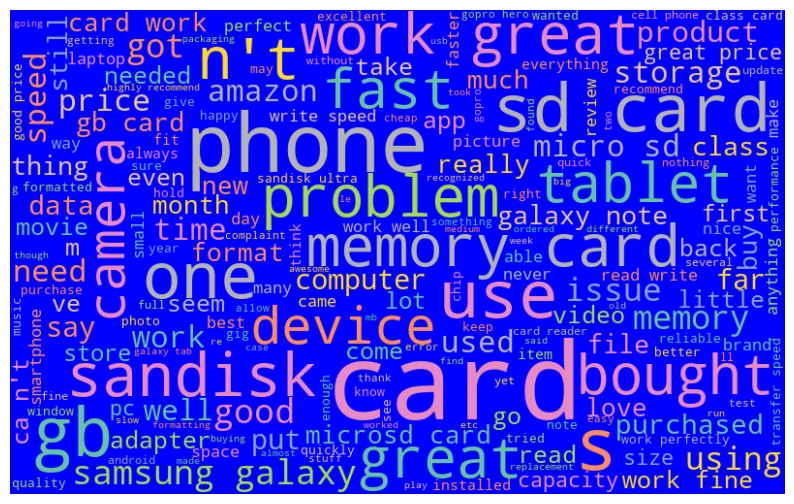

In [25]:
positive_sentiments = ' '.join([text for text in df['reviewText'][df.textblob_sentiment == 'Positive']])
positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,
                               background_color='blue',colormap='Set2').generate(positive_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Negative sentiment word cloud

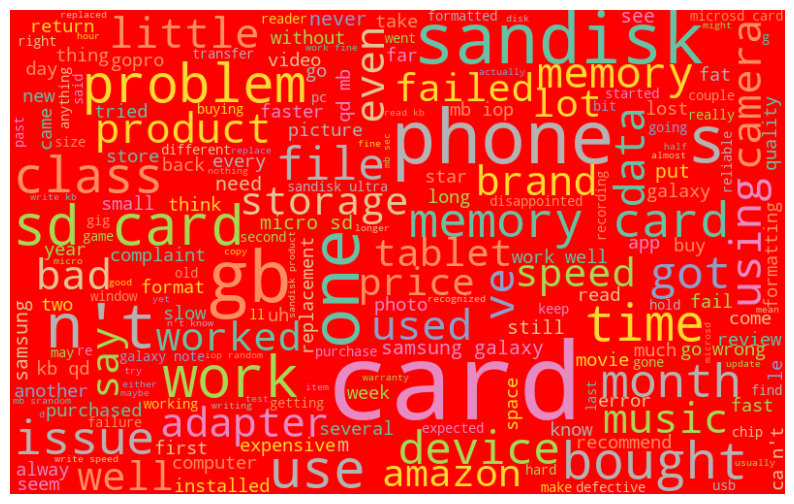

In [26]:
negative_sentiments = ' '.join([text for text in df['reviewText'][df.textblob_sentiment == 'Negative']])
negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,
                               background_color='red',colormap='Set2').generate(negative_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Neutral sentiment word cloud

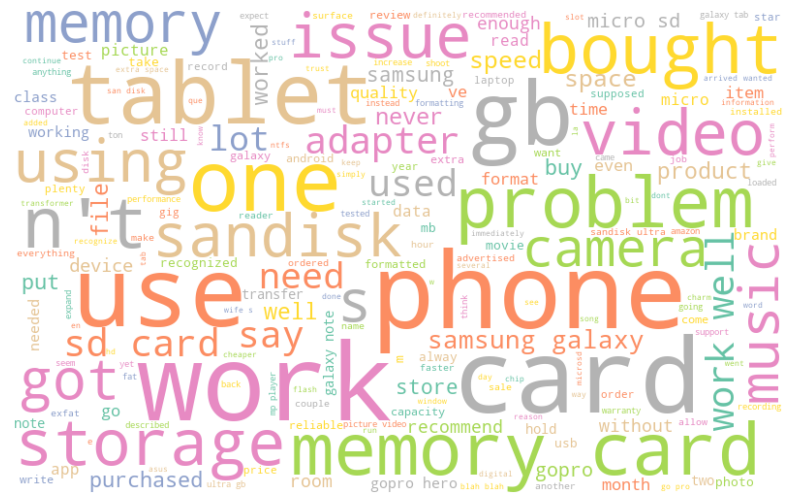

In [27]:
neutral_sentiments = ' '.join([text for text in df['reviewText'][df.textblob_sentiment == 'Neutral']])
neutral_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,
                               background_color='white',colormap='Set2').generate(neutral_sentiments)
plt.figure(figsize=(10, 7))
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<p style="font-size:20px; font-weight:bold;">Sentiment Distribution: </p>   

In [28]:
df['textblob_sentiment'].value_counts()

textblob_sentiment
Positive    4129
Negative     447
Neutral      339
Name: count, dtype: int64

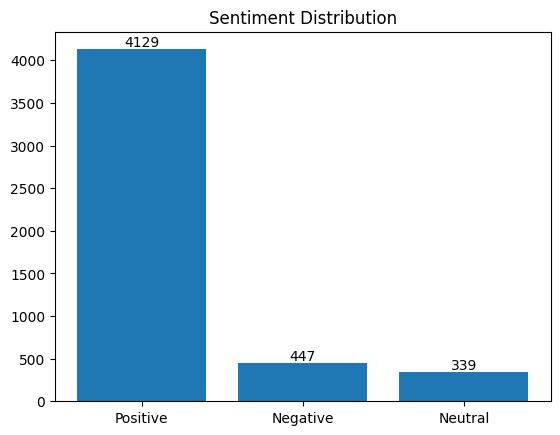

In [39]:
plt.bar(x = df['textblob_sentiment'].value_counts().index ,
        height= df['textblob_sentiment'].value_counts().values)
for index, value in enumerate(df['textblob_sentiment'].value_counts().values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title("Sentiment Distribution")
plt.show()

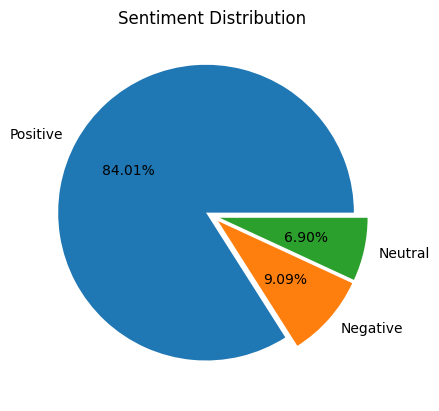

In [40]:
plt.pie(x = df['textblob_sentiment'].value_counts().values, 
        autopct="%0.2f%%", explode= [0.05,0.05,0.05], labels=df.textblob_sentiment.value_counts().index)
plt.title("Sentiment Distribution")
plt.show()

<p style="font-size:20px; font-weight:bold;">Conclusion: </p>   

<p style="font-size:16px;"> Sentiment analysis on the Amazon reviews dataset revealed that the majority of reviews were positive (84%), indicating a generally favorable sentiment among the customers. Negative reviews constituted a smaller portion (9%), suggesting areas where improvements might be needed. Additionally, there were neutral reviews (7%), which could represent opinions that are neither overtly positive nor negative. The combination of TextBlob and VADER methods provided a comprehensive sentiment analysis, allowing for a more robust understanding of customer feedback. This information can be valuable for businesses in making informed decisions to enhance customer satisfaction and improve their products or services </p>   